# 1. Loading and Preprocessing

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import load_iris

In [10]:
# Loading Dataset
iris = load_iris()

# Converting into DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# 2.Clustering Algorithm Implementation
A) KMeans Clustering
B) Hierarchical Clustering

## A) KMeans Clustering

In [18]:
# Applying KMeans Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


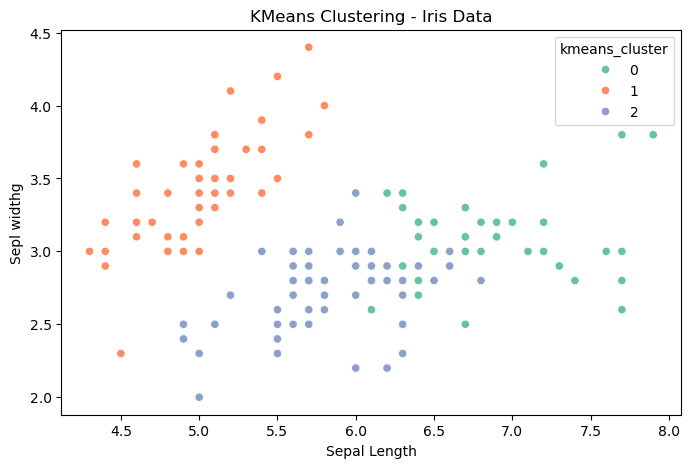

In [26]:
# Ploting Clusters

plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans_cluster'], palette='Set2')
plt.title("KMeans Clustering - Iris Data")
plt.xlabel('Sepal Length')
plt.ylabel('Sepl widthg')
plt.show()

## B) Hierarchical Clustering

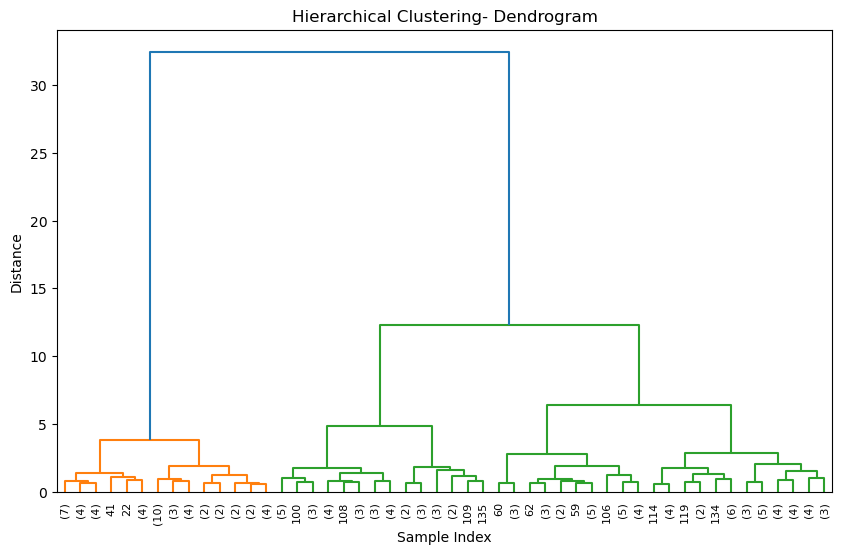

In [31]:
# Applying Hierarchical Clustering
# Creating linkage matrix
linked = linkage(df.iloc[:,:-1], method='ward')

# Ploting dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='lastp', p=50)
plt.title('Hierarchical Clustering- Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [37]:
# Assigning clusters
df['hier_cluster'] = fcluster(linked, t=3, criterion= 'maxclust')

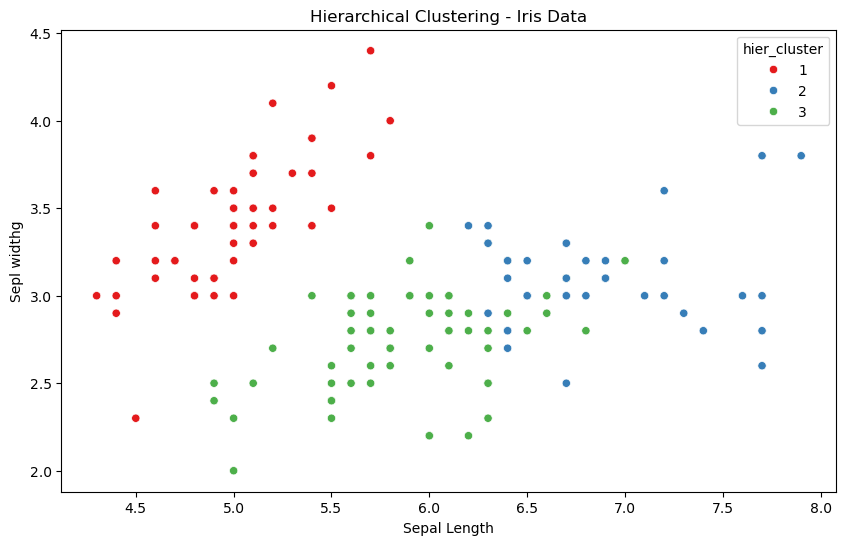

In [39]:
# Ploting the cluster

plt.figure(figsize=(10,6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['hier_cluster'], palette='Set1')
plt.title("Hierarchical Clustering - Iris Data")
plt.xlabel('Sepal Length')
plt.ylabel('Sepl widthg')
plt.show()